## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import time
from numba import njit 
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [3]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    
    #fill the update of u
    for n in range(nt):
        for i in range(1,nx-1):
            u[i]=u[i]+nu*dt/dx**2*(u[i+1]-2*u[i]+u[i-1])
        
    
    return 0

## Numba accelerator

In [4]:
#add the numba decorator to accelerate code
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    
    #fill the update of u
    for n in range(nt):
        for i in range(1,nx-1):
            un[i]=u[i]+nu*dt/dx**2*(u[i+1]-2*u[i]+u[i-1])

    
    return 0

## Pyccel accelerator

In [5]:
#add the pyccel decorator to accelerate code
@types('float[:]','float[:]', 'int', 'int', 'float','float', 'float')
def solve_1d_diff_pyccel(u, un, nt, nx, dt, dx, nu):
    
    #fill the update of u
    s=(dt/dx**2)*nu
    for n in range(nt):
        for i in range(1,nx-1):
            u[i]=u[i]+s*(u[i+1]-2*u[i]+u[i-1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

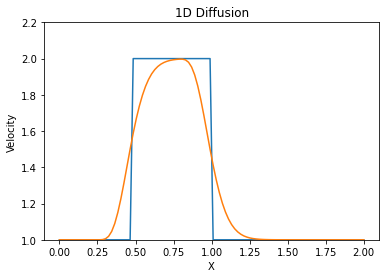

In [6]:
nx = 100
dx = 2 / (nx - 1)
nt = 10   #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [7]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1.3 ms ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with numba accelerator

In [8]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

The slowest run took 12.37 times longer than the fastest. This could mean that an intermediate result is being cached.
2.48 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [9]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [10]:

%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

3.83 µs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
